In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys 
sys.path.insert(1, '/Users/kunalchakraborty/Downloads/Appian/appianway/')

In [3]:
import econometrics

In [4]:
%reload_ext autoreload
%autoreload 2

## Trade identified pairs

In [5]:
data_path = "/Users/kunalchakraborty/Downloads/Appian/data"
df = pd.read_csv(econometrics.get_data(data_path, "main_data.csv"))

In [8]:
performance_df = pd.read_csv(econometrics.get_data(data_path, "rahul_pair_performance.csv"))

In [7]:
## Trade individual pairs
rahul_pair = [('FB', 'GOOG'),
 ('KBH', 'TOL'),
 ('DHI', 'LEN'),
 ('CL', 'PG'),
 ('HAL', 'SLB'),
 ('CVX', 'XOM'),
 ('CSX', 'NSC'),
 ('ITT', 'PH'),
 ('TKR', 'URI'),
 ('RTX', 'WWD'),
 ('LRCX', 'MKSI'),
 ('ADI', 'MCHP'),
 ('QRVO', 'SWKS'),
 ('IP', 'WRK'),
 ('CE', 'EMN'),
 ('CDE', 'HL'),
 ('NUE', 'STLD'),
 ('CC', 'TROX'),
 ('IVV', 'SPY'),
 ('IWF', 'VUG'),
 ('RYN', 'WY')]

In [11]:
X = econometrics.normalize_price(econometrics.extract_time_series(df, "IVV","5. adjusted close", "2019-01-01","2021-07-31"))
Y = econometrics.normalize_price(econometrics.extract_time_series(df, "SPY","5. adjusted close", "2019-01-01","2021-07-31"))

indicator_series = performance_df[performance_df["pair"]=="IVV~SPY"][["end_date", "is_coint"]].set_index("end_date")

In [13]:
# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
def plot_triple_curves(S1,S2, S3,xlabel, ylabel, zlabel, S1_label, S2_label, S3_label):
    fig, host = plt.subplots(figsize=(18,5)) # (width, height) in inches
    
    common_datelist = econometrics.get_common_dates(S2,S3)
    S1 = S1[S1.index.isin(common_datelist)]
    S2 = S2[S2.index.isin(common_datelist)]
    S3 = S3[S3.index.isin(common_datelist)]

    print(S1)
    print(S2)
    print(S3)
    par1 = host.twinx()
    par2 = host.twinx()
    

    host.set_xlabel(xlabel)
    host.set_ylabel(S3_label)
    par1.set_ylabel(S1_label)
    par2.set_ylabel(S2_label)

    color1 = plt.cm.viridis(0)
    color2 = plt.cm.viridis(0.5)
    color3 = plt.cm.viridis(.9)

    p1, = host.plot(S3.index, S3.values, color=color1, label=S3_label)
    p2, = par1.plot(S1.index, S1.values, color=color2, label=S1_label)
    p3, = par2.plot(S2.index, S2.values, color=color3, label=S2_label)

    lns = [p1, p2, p3]
    host.legend(handles=lns, loc='best')

date
2020-01-14   -0.051554
2020-01-15   -0.038051
2020-01-16    0.011947
2020-01-17    0.032019
2020-01-21    0.018881
                ...   
2021-07-23    2.216106
2021-07-26    2.238195
2021-07-27    2.200381
2021-07-28    2.195889
2021-07-29    2.232579
Name: 5. adjusted close, Length: 389, dtype: float64
date
2020-01-14   -0.054531
2020-01-15   -0.040954
2020-01-16    0.009134
2020-01-17    0.028032
2020-01-21    0.016106
                ...   
2021-07-23    2.217333
2021-07-26    2.237659
2021-07-27    2.199831
2021-07-28    2.196443
2021-07-29    2.230696
Name: 5. adjusted close, Length: 389, dtype: float64
            is_coint
end_date            
2020-01-14         1
2020-01-15         1
2020-01-16         1
2020-01-17         1
2020-01-21         1
...              ...
2021-07-23         1
2021-07-26         1
2021-07-27         1
2021-07-28         1
2021-07-29         1

[389 rows x 1 columns]


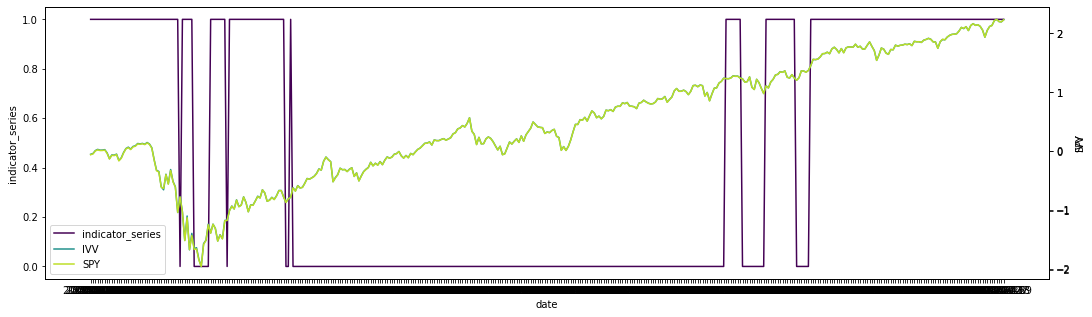

In [14]:
plot_triple_curves(X,Y,indicator_series, "date", "price1", "price2", "IVV", "SPY","indicator_series")

In [20]:
X = econometrics.normalize_price(econometrics.extract_time_series(df, "ADI","5. adjusted close", "2019-01-01","2021-07-31"))
Y = econometrics.normalize_price(econometrics.extract_time_series(df, "MCHP","5. adjusted close", "2019-01-01","2021-07-31"))

indicator_series = performance_df[performance_df["pair"]=="ADI~MCHP"][["end_date", "is_coint"]].set_index("end_date")

date
2020-01-14   -0.193160
2020-01-15   -0.278867
2020-01-16   -0.210132
2020-01-17   -0.195706
2020-01-21   -0.202495
                ...   
2021-07-23    1.883277
2021-07-26    1.898574
2021-07-27    1.841320
2021-07-28    1.904693
2021-07-29    2.013956
Name: 5. adjusted close, Length: 389, dtype: float64
date
2020-01-14    0.043601
2020-01-15   -0.049540
2020-01-16   -0.004070
2020-01-17    0.017566
2020-01-21    0.011332
                ...   
2021-07-23    1.208210
2021-07-26    1.214563
2021-07-27    1.086009
2021-07-28    1.158134
2021-07-29    1.275851
Name: 5. adjusted close, Length: 389, dtype: float64
            is_coint
end_date            
2020-01-14         0
2020-01-15         0
2020-01-16         0
2020-01-17         0
2020-01-21         0
...              ...
2021-07-23         0
2021-07-26         0
2021-07-27         0
2021-07-28         0
2021-07-29         0

[389 rows x 1 columns]


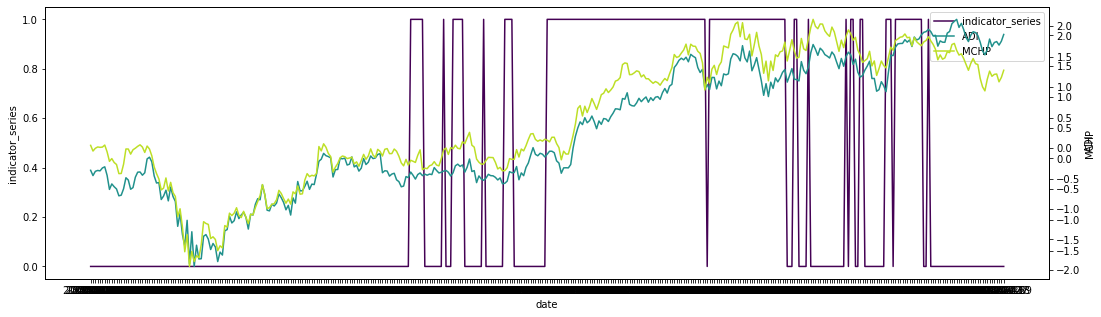

In [21]:
plot_triple_curves(X,Y,indicator_series, "date", "price1", "price2", "ADI", "MCHP","indicator_series")

<AxesSubplot:xlabel='date'>

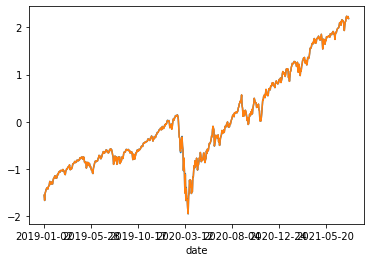

In [15]:
X.plot()
Y.plot()